In [ ]:
#%pip install pyserial

In [ ]:
import serial

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal

In [33]:
def tomaLecturas(puerto:str,cantidad:int,ancho:int=2,orden:str='little'):
    with serial.Serial(puerto) as s:
        datos=s.read(ancho*cantidad)
    return np.array([ int.from_bytes(datos[ancho*i:ancho*(i+1)],orden,signed=False) for i in range(cantidad)])

In [80]:
lecturas = tomaLecturas("COM3",16384)

In [81]:
periodograma = scipy.signal.periodogram(lecturas,10000,'hamming')

(0.0, 500.0)

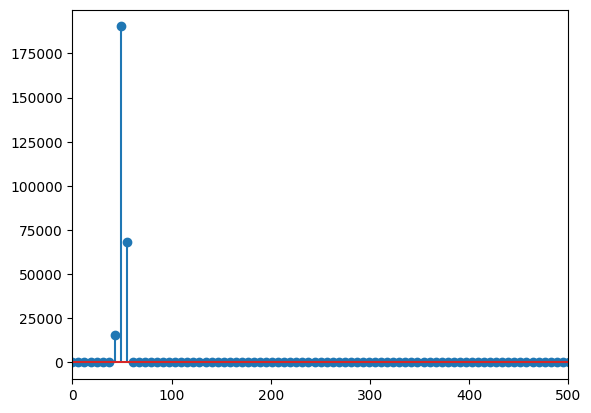

In [82]:
plt.stem(*periodograma)
plt.xlim(0,500)

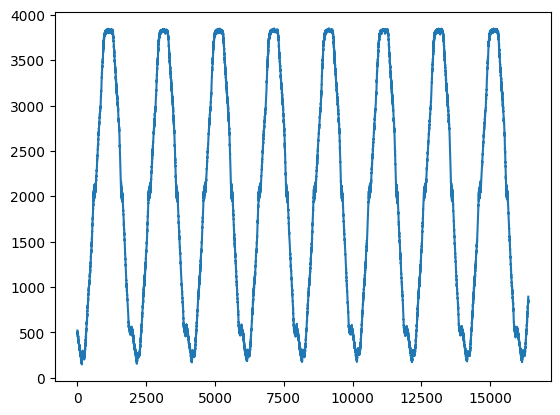

In [84]:
plt.plot(lecturas)